In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.options.display.max_columns = None

In [2]:
df_aves_15 = pd.read_csv("data/avistamientos/vis_2015.csv")
df_aves_16 = pd.read_csv("data/avistamientos/vis_2016.csv")
df_aves_17 = pd.read_csv("data/avistamientos/vis_2017.csv")
df_aves_18 = pd.read_csv("data/avistamientos/vis_2018.csv")
df_aves_19 = pd.read_csv("data/avistamientos/vis_2019.csv")
df_aves_20 = pd.read_csv("data/avistamientos/vis_2020.csv")
df_aves_21 = pd.read_csv("data/avistamientos/vis_2021.csv")
df_aves_22 = pd.read_csv("data/avistamientos/vis_2022.csv")

In [3]:
# Agrupar los avistamientos por locName, para obtener el número de avistamientos por localidad en 2020 y el tipo de ave 
df_aves_localida = df_aves_20.groupby(['locName', 'comName']).size().reset_index(name='counts')
df_aves_localida = df_aves_localida.sort_values(by=['counts'], ascending=False)
df_aves_localida = df_aves_localida.reset_index(drop=True)
df_aves_localida


,locName,comName,counts
0,Las Quemas Altas,Slender-billed Parakeet,160
1,Las Quemas Altas,Grass Wren,156
2,Las Quemas Altas,Chilean Flicker,109
3,"Leñadura, Nuestra casa",Ruddy-headed Goose,108
4,"Leñadura, Nuestra casa",Imperial Cormorant,89
...,...,...,...
33205,Estero Catapilco--Desembocadura (Laguna Zapallar),Snowy Egret,1
33206,Estero Catapilco--Desembocadura (Laguna Zapallar),Silvery Grebe,1
33207,Estero Catapilco--Desembocadura (Laguna Zapallar),Seaside Cinclodes,1
33208,Estero Catapilco--Desembocadura (Laguna Zapallar),Sanderling,1


In [4]:
df_aves_15.sort_values(by="howMany", ascending=False).head(10)
df_aves_16.sort_values(by="howMany", ascending=False).head(10)
df_aves_17.sort_values(by="howMany", ascending=False).head(10)
df_aves_18.sort_values(by="howMany", ascending=False).head(10)
df_aves_19.sort_values(by="howMany", ascending=False).head(10)
df_aves_20.sort_values(by="howMany", ascending=False).head(10)
df_aves_21.sort_values(by="howMany", ascending=False).head(10)
df_aves_22.sort_values(by="howMany", ascending=False).head(10)


,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,locationPrivate,exoticCategory,region
59800,impcor1,Imperial Cormorant,Leucocarbo atriceps,L3438732,MN Los Pingüinos--Isla Magdalena,2022-11-11,50000.0,-52.920237,-70.575957,False,-1,Magallanes
10397,sooshe,Sooty Shearwater,Ardenna grisea,L947356,Moncul,2022-02-21,30000.0,-38.746787,-73.436394,False,-1,Araucanía
1752,redkno,Red Knot,Calidris canutus,L18473398,SN Bahía Lomas--Desembocadura Río Side,2022-01-09,14073.0,-52.682552,-69.184681,False,-1,Magallanes
43677,maspet,Markham's Storm-Petrel,Hydrobates markhami,L16872547,Quebrada de Vitor--Mirador,2022-08-25,8000.0,-18.748319,-70.337648,False,-1,Arica y Parinacota
9791,sooshe,Sooty Shearwater,Ardenna grisea,L17797457,Bay Talcahuano,2022-02-18,8000.0,-36.675372,-73.034720,True,-1,Bío-Bío
60486,guacor1,Guanay Cormorant,Leucocarbo bougainvillii,L19352319,Islas Cullintos,2022-11-13,7000.0,-36.786346,-73.219790,False,-1,Bío-Bío
17941,fragul,Franklin's Gull,Leucophaeus pipixcan,L10559998,Canal El Morro--Desembocadura,2022-03-31,6000.0,-36.723307,-73.102692,False,-1,Bío-Bío
30456,grygul,Gray Gull,Leucophaeus modestus,L668852,Río Lluta--Desembocadura,2022-06-08,6000.0,-18.416539,-70.322408,False,-1,Arica y Parinacota
29728,grygul,Gray Gull,Leucophaeus modestus,L668852,Río Lluta--Desembocadura,2022-06-03,5000.0,-18.416539,-70.322408,False,-1,Arica y Parinacota
30054,grygul,Gray Gull,Leucophaeus modestus,L668852,Río Lluta--Desembocadura,2022-06-05,5000.0,-18.416539,-70.322408,False,-1,Arica y Parinacota


In [5]:
# Agruparemos df_aves_20, por obsDT, para ver por mes la cantidad de avistamientos de aves en total, por lo tanto sumaremos la columna howMany para cada mes y lo guardaremos en un nuevo dataframe llamado df_aves_20_mes
df_aves_20_mes = df_aves_20.groupby("obsDt").sum()
df_aves_20_mes = df_aves_20_mes.reset_index()
df_aves_20_mes = df_aves_20_mes[["obsDt", "howMany"]]
df_aves_20_mes = df_aves_20_mes.rename(columns={"obsDt": "mes", "howMany": "cantidad"})
df_aves_20_mes["mes"] = pd.to_datetime(df_aves_20_mes["mes"])
df_aves_20_mes["mes"] = df_aves_20_mes["mes"].dt.month
df_aves_20_mes = df_aves_20_mes.groupby("mes").sum()
df_aves_20_mes = df_aves_20_mes.reset_index()
df_aves_20_mes



,mes,cantidad
0,1,108313.0
1,2,114806.0
2,3,63550.0
3,4,53499.0
4,5,41607.0
5,6,55281.0
6,7,54309.0
7,8,43037.0
8,9,50648.0
9,10,53092.0


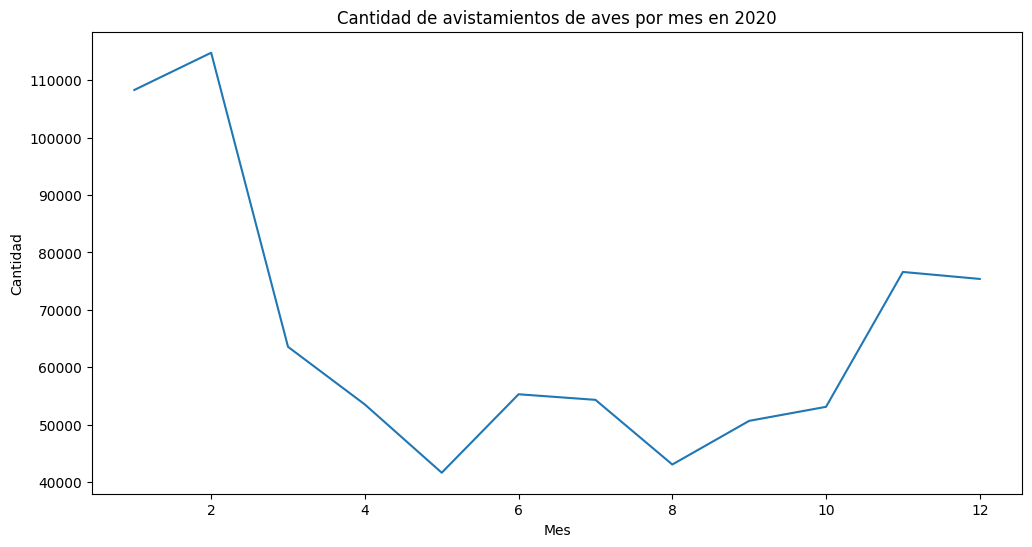

In [6]:
# Graficaremos df_aves_20_mes, por cada mes, con mes 1,2,3,4,5,6,7,8,9,10,11,12 con lineplot 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_aves_20_mes, x="mes", y="cantidad")
plt.title("Cantidad de avistamientos de aves por mes en 2020")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.show()




In [7]:
df_aves_19.dtypes

speciesCode         object
comName             object
sciName             object
locId               object
locName             object
obsDt               object
howMany            float64
lat                float64
lng                float64
locationPrivate       bool
exoticCategory       int64
region              object
dtype: object

In [8]:
df_aves_18.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory
144,Franklin's Gull,47416.0,-8383.307460,-18420.383674,79,-256
348,Sooty Shearwater,34844.0,-6936.670185,-12037.159098,79,-168
187,Hudsonian Godwit,31127.0,-8061.208749,-14750.384414,51,-203
324,Sanderling,28799.0,-6798.496034,-15580.971982,34,-218
153,Gray Gull,24909.0,-8539.461260,-22296.893685,94,-314
...,...,...,...,...,...,...
386,Turquoise-fronted Parrot,1.0,-19.312844,-69.426126,0,1
391,Variable Oriole,1.0,-31.899238,-70.677710,0,-1
398,Western Rosella,1.0,-30.004169,-71.004655,1,1
399,Western Sandpiper,1.0,-33.619801,-71.627544,0,-1


In [9]:
df_aves_19.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)


,comName,howMany,lat,lng,locationPrivate,exoticCategory
347,Sooty Shearwater,53720.0,-7597.871559,-13203.142375,93,-184
181,Guanay Cormorant,42422.0,-6848.262157,-16684.024688,52,-234
149,Franklin's Gull,25153.0,-6886.435551,-15431.016202,39,-215
386,Upland Goose,20302.0,-17682.340562,-24191.688202,177,-341
339,Slender-billed Parakeet,20231.0,-13272.223946,-23827.651438,71,-326
...,...,...,...,...,...,...
162,Gray-breasted Martin,1.0,-18.216103,-69.301457,0,-1
227,Mandarin Duck,1.0,-36.828747,-73.010057,1,1
393,Wedge-tailed Shearwater,1.0,-27.200003,-109.454223,0,-1
392,Wedge-rumped Storm-Petrel,1.0,-24.508915,-73.370752,1,-1


In [10]:
# Sumaremos toda la columna de howmany para obtener el total de avistamientes en general
df_aves_19["howMany"].sum()


723965.0

In [11]:

df_aves_20.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)



,comName,howMany,lat,lng,locationPrivate,exoticCategory
352,Sooty Shearwater,111402.0,-5552.891279,-9538.916263,80,-132
152,Franklin's Gull,46545.0,-5758.105646,-12499.238099,52,-174
185,Guanay Cormorant,44707.0,-6379.291417,-15079.716483,44,-211
144,Elegant Tern,21207.0,-4970.145368,-11742.818630,32,-164
197,Imperial Cormorant,20455.0,-17454.807550,-25541.426875,202,-356
...,...,...,...,...,...,...
397,Wattled Jacana,1.0,-39.912831,-73.513036,1,-1
398,Waved Albatross,1.0,-32.769378,-71.583824,0,-1
323,Rufous-webbed Bush-Tyrant,1.0,-18.413088,-69.507151,0,-1
409,White-capped Albatross,1.0,-33.000890,-71.947918,0,-1


In [12]:
df_aves_20["howMany"].sum()



790120.0

In [13]:
df_aves_21.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory
339,Sooty Shearwater,85988.0,-6143.694073,-11191.915667,64,-155
315,Sanderling,34618.0,-6973.359178,-16502.139687,48,-231
176,Guanay Cormorant,34397.0,-8823.323163,-20603.086467,69,-288
186,Hudsonian Godwit,30731.0,-9664.262005,-19644.444245,82,-272
375,Upland Goose,25450.0,-18155.881242,-25190.932492,204,-354
...,...,...,...,...,...,...
100,Chimney Swift,1.0,-18.575274,-70.023594,0,-1
300,Ruddy Duck,1.0,-33.206443,-70.827913,0,1
295,Roadside Hawk,1.0,-25.004222,-70.465334,1,-1
402,White-tailed Tropicbird,1.0,-27.095000,-109.246667,1,-1


In [14]:
df_aves_21["howMany"].sum()



800179.0

In [15]:
df_aves_22.groupby(by="comName").sum('howMany').reset_index().sort_values(by="howMany", ascending=False)

,comName,howMany,lat,lng,locationPrivate,exoticCategory
365,Sooty Shearwater,101235.0,-10048.139285,-17860.475762,121,-249
204,Imperial Cormorant,65303.0,-17331.710808,-25865.435304,114,-360
166,Gray Gull,45917.0,-9899.041201,-25462.401739,72,-358
191,Guanay Cormorant,44903.0,-9528.384222,-22188.734826,55,-310
339,Sanderling,42133.0,-8703.146592,-20023.918436,40,-280
...,...,...,...,...,...,...
417,Western Tanager,1.0,-18.382193,-69.945776,0,-1
70,Blue-crowned Parakeet,1.0,-18.480749,-70.309153,0,2
219,Least Bittern,1.0,-21.429201,-70.058549,0,-1
63,Black-winged Petrel,1.0,-27.200003,-109.454223,0,-1


In [16]:
df_aves_22["howMany"].sum()


943959.0

In [17]:
# Queremos graficar la columna howMany de cada dataframe para ver la evolución de los avistamientos de aves en los últimos años en Chile 
# Para esto, crearemos un nuevo dataframe que contenga la suma de la columna howMany de cada dataframe de avistamientos
df_aves_cantidad = pd.DataFrame(columns=["year", "howMany"])
df_aves_cantidad["year"] = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
df_aves_cantidad["howMany"] = [df_aves_15["howMany"].sum(), df_aves_16["howMany"].sum(), df_aves_17["howMany"].sum(), df_aves_18["howMany"].sum(), df_aves_19["howMany"].sum(), df_aves_20["howMany"].sum(), df_aves_21["howMany"].sum(), df_aves_22["howMany"].sum()]


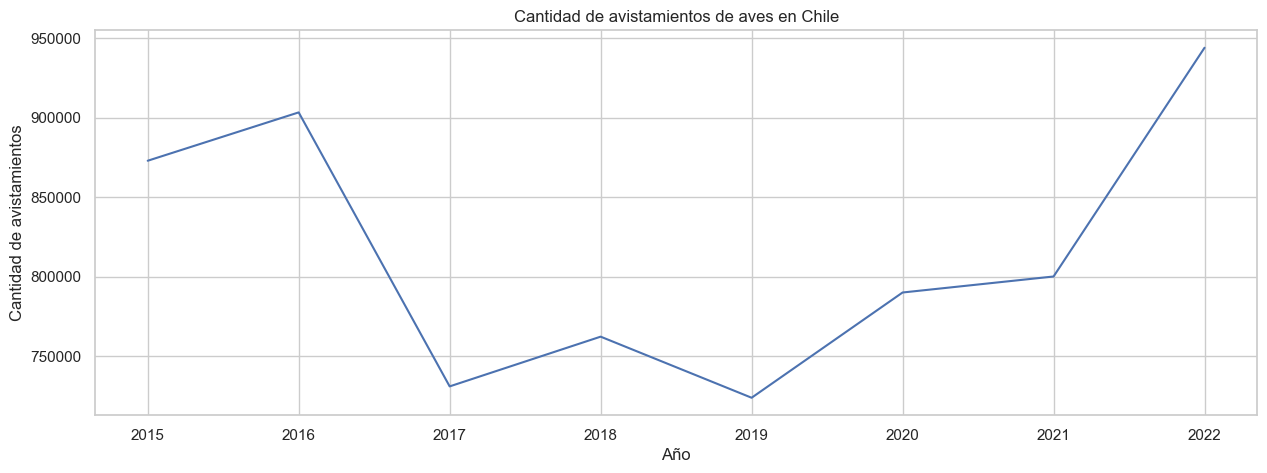

In [18]:
# Graficaremos grid
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_aves_cantidad, x="year", y="howMany")
plt.title("Cantidad de avistamientos de aves en Chile")
plt.xlabel("Año")
plt.ylabel("Cantidad de avistamientos")
plt.show()


In [49]:
# Prepararemos df's para realizar una prediccion para el año 2023.
# Para esto, crearemos un nuevo dataframe que contenga la suma de la columna howMany de cada dataframe de avistamientos
df_2015 = pd.DataFrame(columns=["year", "howMany"])
df_2015["year"] = [2015]
df_2015["howMany"] = [df_aves_15["howMany"].sum()]

df_2016 = pd.DataFrame(columns=["year", "howMany"])
df_2016["year"] = [2016]
df_2016["howMany"] = [df_aves_16["howMany"].sum()]  

df_2017 = pd.DataFrame(columns=["year", "howMany"])
df_2017["year"] = [2017]
df_2017["howMany"] = [df_aves_17["howMany"].sum()]

df_2018 = pd.DataFrame(columns=["year", "howMany"])
df_2018["year"] = [2018]
df_2018["howMany"] = [df_aves_18["howMany"].sum()]

df_2019 = pd.DataFrame(columns=["year", "howMany"])
df_2019["year"] = [2019]
df_2019["howMany"] = [df_aves_19["howMany"].sum()]

df_2020 = pd.DataFrame(columns=["year", "howMany"])
df_2020["year"] = [2020]
df_2020["howMany"] = [df_aves_20["howMany"].sum()]

df_2021 = pd.DataFrame(columns=["year", "howMany"])
df_2021["year"] = [2021]
df_2021["howMany"] = [df_aves_21["howMany"].sum()]

df_2022 = pd.DataFrame(columns=["year", "howMany"])
df_2022["year"] = [2022]
df_2022["howMany"] = [df_aves_22["howMany"].sum()]




In [50]:
# Concatearemos todos los df's en uno solo 
df_total_predict = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022])
df_total_predict = df_total_predict.reset_index(drop=True)
df_total_predict


,year,howMany
0,2015,872937.0
1,2016,903323.0
2,2017,731102.0
3,2018,762365.0
4,2019,723965.0
5,2020,790120.0
6,2021,800179.0
7,2022,943959.0


In [51]:
# Ahora con estos datos realizaremos una prediccion para el año 2023
# Primero, importaremos la libreria de sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_total_predict[["year"]].values.reshape(-1, 1)
y = df_total_predict["howMany"]

# Dividiremos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar una prediccion
y_pred = model.predict(X_test)

# Predecir para el 2023 y 2024
y_pred_2023 = model.predict([[2023]])
y_pred_2024 = model.predict([[2024]])

print("Prediccion para el año 2023: ", y_pred_2023)



Prediccion para el año 2023:  [831242.04]


In [52]:
# Unimos el año 2023 en el df 
df_2023 = pd.DataFrame(columns=["year", "howMany"])
df_2023["year"] = [2023]
df_2023["howMany"] = y_pred_2023
df_total_predict = pd.concat([df_total_predict, df_2023])
df_total_predict = df_total_predict.reset_index(drop=True)
df_total_predict


,year,howMany
0,2015,872937.00
1,2016,903323.00
2,2017,731102.00
3,2018,762365.00
4,2019,723965.00
5,2020,790120.00
6,2021,800179.00
7,2022,943959.00
8,2023,831242.04


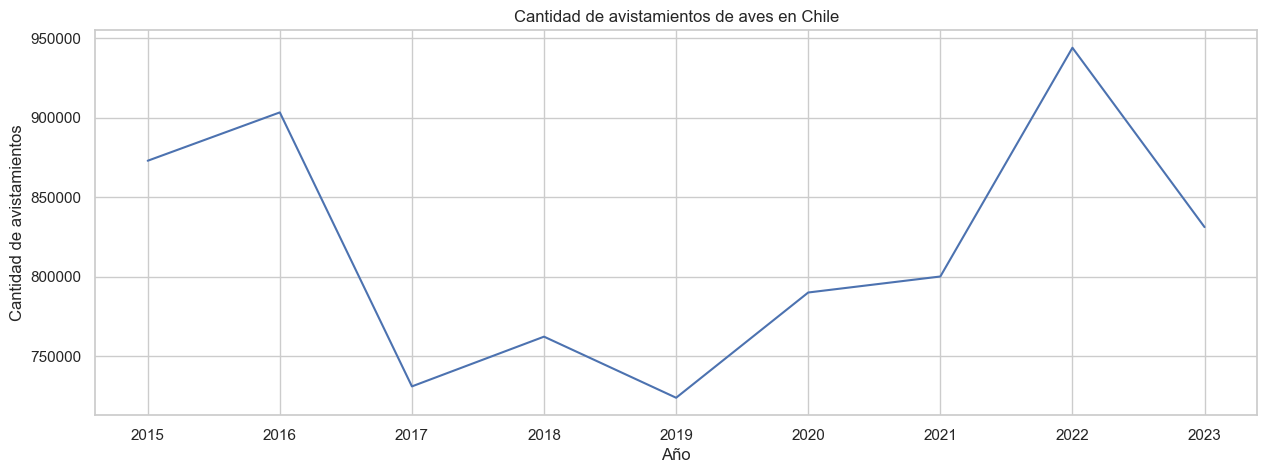

In [53]:
# Graficaremos el df_total_predict
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_total_predict, x="year", y="howMany")
plt.title("Cantidad de avistamientos de aves en Chile")
plt.xlabel("Año")
plt.ylabel("Cantidad de avistamientos")
plt.show()
